In [40]:
import pandas as pd
import numpy as np
file_to_load = "JEOPARDY_CSV.csv"
Show_data = pd.read_csv(file_to_load)
print(Show_data.head())



   Show Number    Air Date      Round                         Category  Value  \
0         4680  12/31/2004  Jeopardy!                          HISTORY  $200    
1         4680  12/31/2004  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  $200    
2         4680  12/31/2004  Jeopardy!      EVERYBODY TALKS ABOUT IT...  $200    
3         4680  12/31/2004  Jeopardy!                 THE COMPANY LINE  $200    
4         4680  12/31/2004  Jeopardy!              EPITAPHS & TRIBUTES  $200    

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  


In [41]:
show_data2 = pd.DataFrame(Show_data)
show_data2.columns = ['Show Number', 'Air Date', 'Round', 'Category', 'Value',
       'Question', 'Answer']
show_data2.shape[0]

216930

In [42]:
#show_unique = Show_data["Round"].value_counts()
#show_unique1 = pd.DataFrame(show_unique)
#show_unique1



In [43]:
show_data2['Air Date']=pd.to_datetime(show_data2['Air Date'])
show_data2['Year']=show_data2['Air Date'].dt.year
show_grouped = Show_data.groupby("Year")["Round"].nunique()
show_grouped.columns = ['Year', 'Unique Shows in Year']
show_grouped

Year
1984    3
1985    3
1986    3
1987    3
1988    3
1989    3
1990    3
1991    3
1992    3
1993    3
1994    3
1995    3
1996    3
1997    4
1998    3
1999    3
2000    3
2001    3
2002    4
2003    3
2004    3
2005    3
2006    3
2007    4
2008    3
2009    3
2010    3
2011    3
2012    3
Name: Round, dtype: int64

In [44]:
#What are the top 10 most frequently used categories of questions?
category_count = Show_data["Category"].value_counts()
category_count = pd.DataFrame(category_count)
category_count.head(10)

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
WORLD HISTORY,377
WORD ORIGINS,371
COLLEGES & UNIVERSITIES,351
HISTORY,349
SPORTS,342


<AxesSubplot:xlabel='Year'>

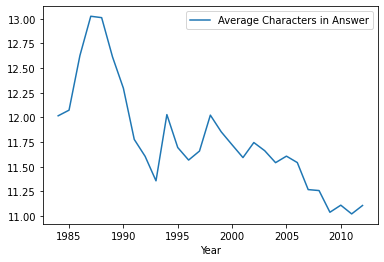

In [61]:
#Plot number of characters in top 10 questions against the years the questions were asked in
show_data2['Answer Character Count']=show_data2['Answer'].str.len()
biggest_answers = show_data2.sort_values(by='Answer Character Count', ascending=False)

answers_year = biggest_answers.groupby("Year")
average_characters_by_year = answers_year["Answer Character Count"].mean()
year_char = pd.DataFrame({'Average Characters in Answer': average_characters_by_year})
import matplotlib.pyplot as plt
year_char.plot()